# PyPI qqman GWAS plots  

Example using Type 2 Diabetes GWAS data from OpenGWAS Project

https://gwas.mrcieu.ac.uk/datasets/ieu-a-25/

#### Imports & setup

In [1]:
import os
import pandas as pd
from qqman import qqman
import matplotlib.pyplot as plt

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#### File I/O variables

In [2]:
## input files
dir_gwas = '../data/gwas_plink'

plink_assoc = 'ieu-a-25.assoc'
plink_logistic = 'ieu-a-25.assoc.logistic'

## output dir
dir_plot = '../data/gwas_plink/plots_pypi_qqman'

#### setup variables

In [3]:
gwas_file_assoc = os.path.join(dir_gwas, plink_assoc)
plot_prefix_assoc = os.path.join(dir_plot, plink_assoc)

gwas_file_logistic = os.path.join(dir_gwas, plink_logistic)
plot_prefix_logistic = os.path.join(dir_plot, plink_logistic)


## create output directory (if needed)
!mkdir -p {dir_plot}

<br>  

## plot PLINK --assoc output

In [4]:
!head {gwas_file_assoc}

CHR SNP BP A1 F_A F_U A2 CHISQ P OR
1 1_120437718_rs2793823 120437718 A 0.0 0.0 G 0.0 0.0014000063322395298 0.0592119
1 1_120437884_rs2641348 120437884 G 0.0 0.0 A 0.0 0.001099993198935193 0.064851
1 1_120438577_rs147294252 120438577 A 0.0 0.0 G 0.0 0.2499999950079739 0.123986
1 1_120439109_rs6668119 120439109 C 0.0 0.0 G 0.0 0.0007299951924762002 0.0685928
1 1_120440029_rs2027447 120440029 C 0.0 0.0 T 0.0 0.0006800017024408913 0.0676586
1 1_120441885_rs76686822 120441885 T 0.0 0.0 C 0.0 0.8700000949167117 0.0119286
1 1_120441998_rs2487568 120441998 G 0.0 0.0 A 0.0 0.001199996557048116 0.0601539
1 1_120442257_rs2487569 120442257 T 0.0 0.0 A 0.0 0.01600000063897936 0.0573251
1 1_120443424_rs180671497 120443424 A 0.0 0.0 C 0.0 0.5500003932313995 0.0601539


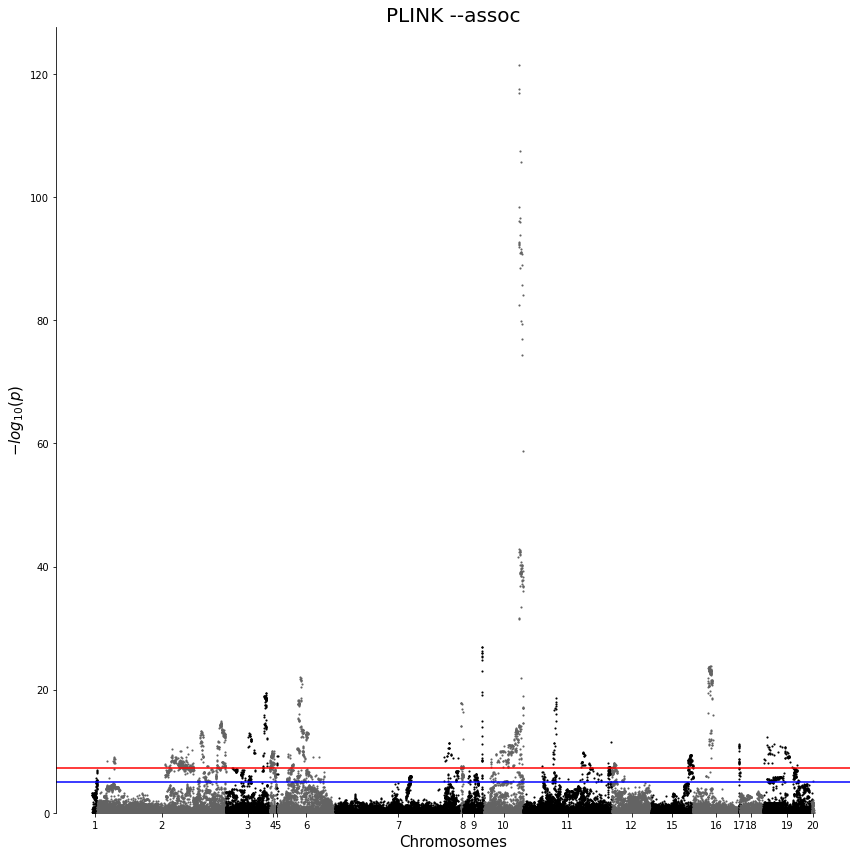

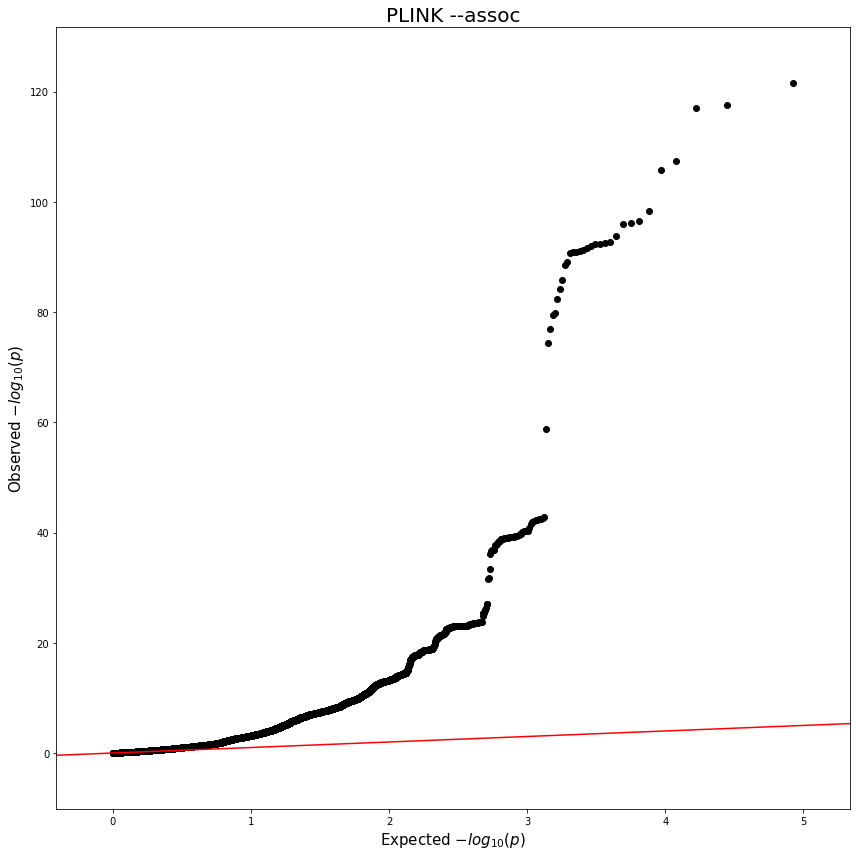

In [5]:
## generate Manhattan plot
qqman.manhattan(gwas_file_assoc, 
                out=plot_prefix_assoc+'.Manhattan.png', 
                show=True, 
                title='PLINK --assoc')

## generate qqplot
qqman.qqplot(gwas_file_assoc, 
                out=plot_prefix_assoc+'.qqplot.png', 
                show=True, 
                title='PLINK --assoc')


#### Generate --assoc plots as subplot example

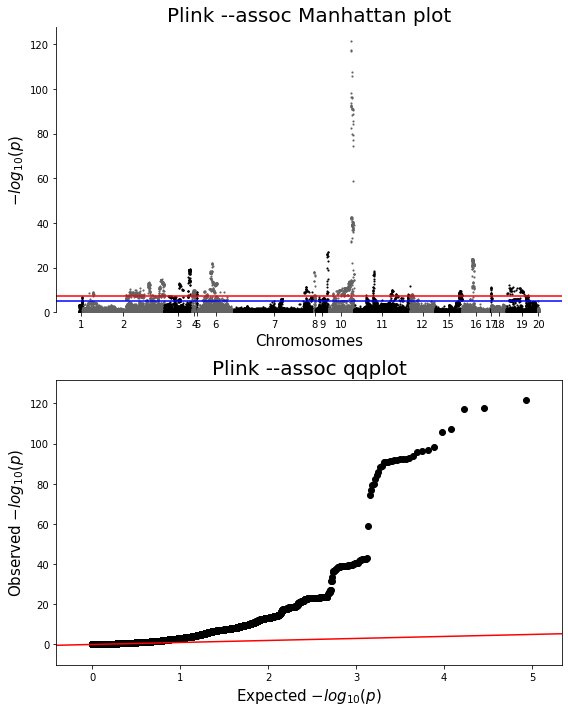

In [6]:
## generate plot figure
figure, axes = plt.subplots(nrows=2, ncols=1, figsize = (8,10))

qqman.manhattan(gwas_file_assoc, ax=axes[0], title="Plink --assoc Manhattan plot")
qqman.qqplot(gwas_file_assoc, ax=axes[1], title="Plink --assoc qqplot")

figure.tight_layout()

#### Write output plot files  

> set `show=False`

In [7]:
## generate Manhattan plot
qqman.manhattan(gwas_file_assoc, 
                out=plot_prefix_assoc+'.Manhattan.png', 
                show=False, 
                title='PLINK --assoc')

## generate qqplot
qqman.qqplot(gwas_file_assoc, 
                out=plot_prefix_assoc+'.qqplot.png', 
                show=False, 
                title='PLINK --assoc')

<br>  

## plot PLINK --logistic output

In [8]:
!head {gwas_file_logistic}

CHR SNP BP A1 TEST NMISS OR SE STAT P
1 1_120437718_rs2793823 120437718 A ADD 73902.3 0.0592119 0.0185129 0.0 0.0014000063322395298
1 1_120437884_rs2641348 120437884 G ADD 73902.3 0.064851 0.0200746 0.0 0.001099993198935193
1 1_120438577_rs147294252 120438577 A ADD 67530.5 0.123986 0.108496 0.0 0.2499999950079739
1 1_120439109_rs6668119 120439109 C ADD 73902.3 0.0685928 0.0202474 0.0 0.0007299951924762002
1 1_120440029_rs2027447 120440029 C ADD 73902.3 0.0676586 0.0200183 0.0 0.0006800017024408913
1 1_120441885_rs76686822 120441885 T ADD 73902.4 0.0119286 0.0733156 0.0 0.8700000949167117
1 1_120441998_rs2487568 120441998 G ADD 73902.3 0.0601539 0.0184955 0.0 0.001199996557048116
1 1_120442257_rs2487569 120442257 T ADD 73901.9 0.0573251 0.0238317 0.0 0.01600000063897936
1 1_120443424_rs180671497 120443424 A ADD 68337.2 0.0601539 0.0998053 0.0 0.5500003932313995


<br>

## <font color='blue'> *_NOTE: need to extract P-values from --logistic output --> pass to qqplot function_* </font>

reason for this is due to bug in the pypi qqman package:   

* error when parsing file 'TEST' column when tries to cast 'ADD' string to float  
* see error message below for details  



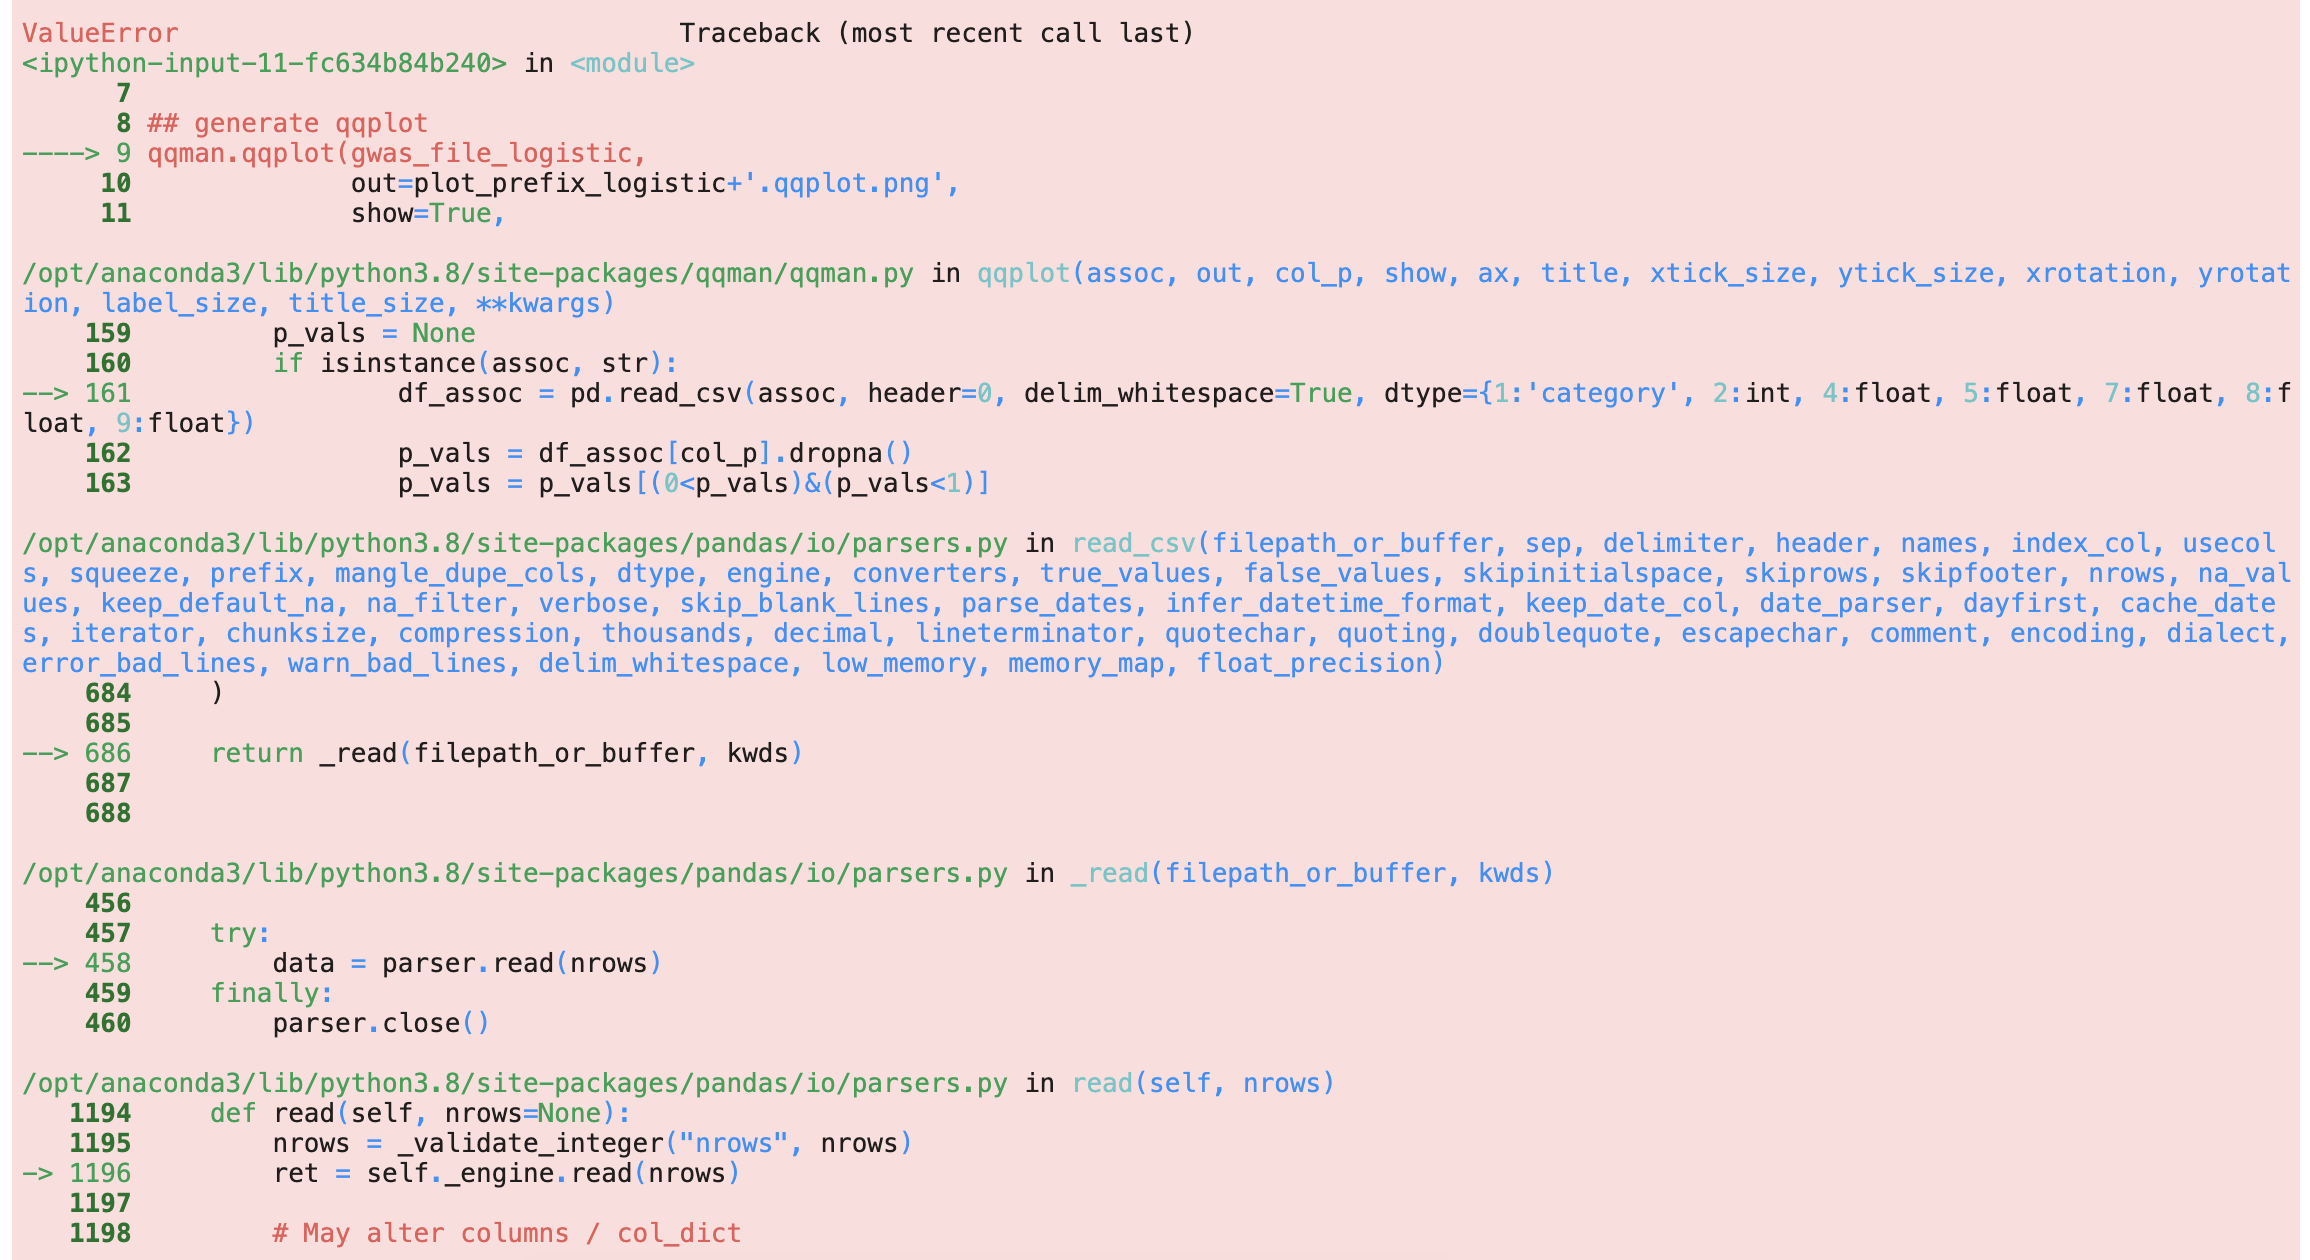  
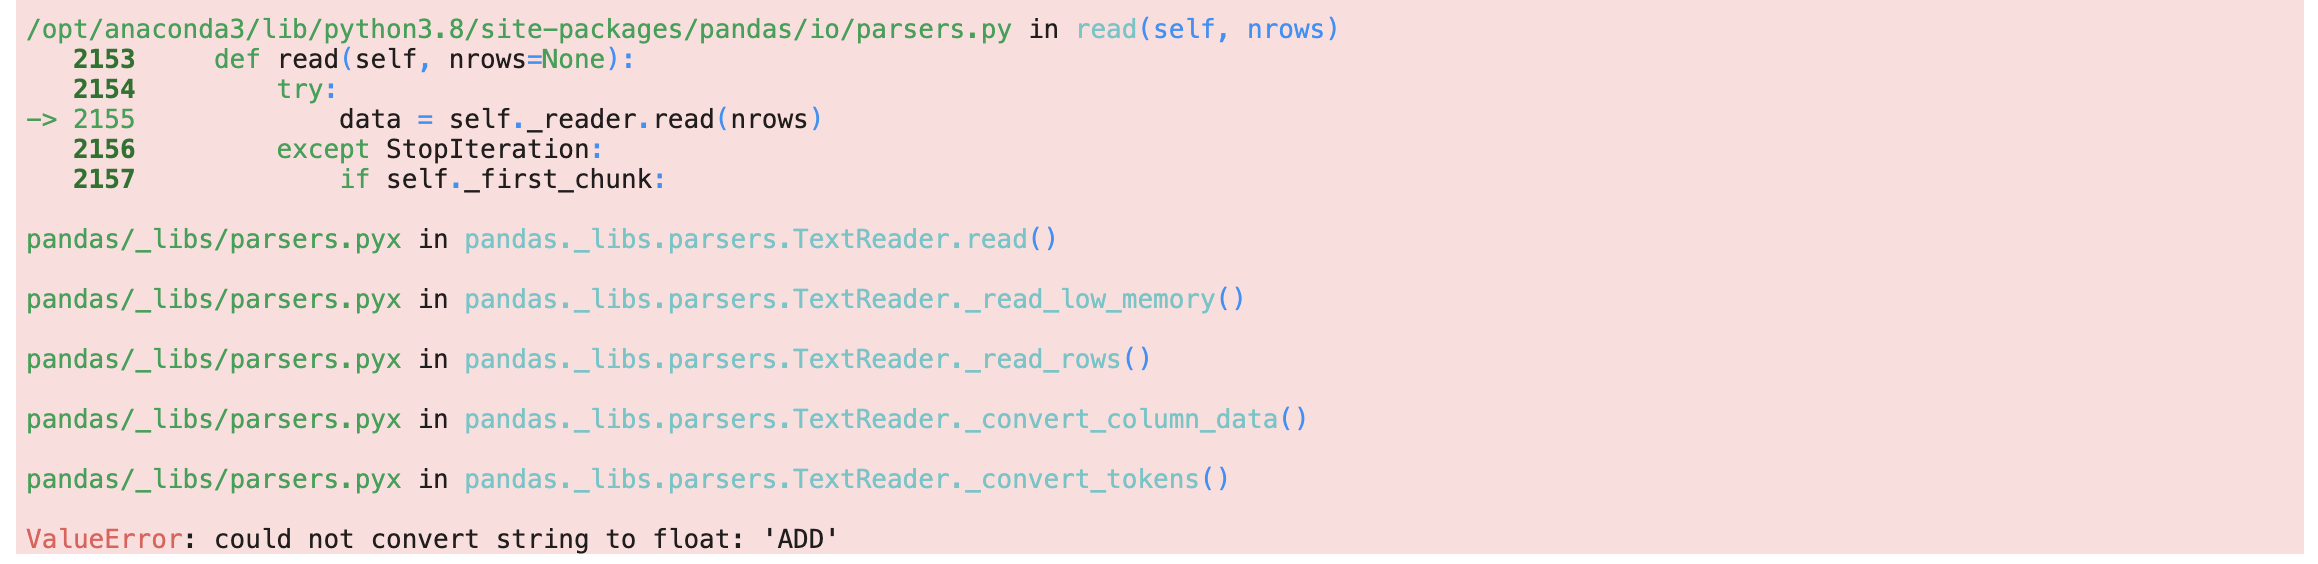

#### read in .assoc.logistic file --> Pandas DF & extract 'P' value column to list & delete DF

In [9]:
df = pd.read_csv(gwas_file_logistic, header=0, delim_whitespace=True)

df.head()

pval_logistic = list(df['P'])
del df

CHR                      SNP         BP A1 TEST    NMISS        OR  \
0    1    1_120437718_rs2793823  120437718  A  ADD  73902.3  0.059212   
1    1    1_120437884_rs2641348  120437884  G  ADD  73902.3  0.064851   
2    1  1_120438577_rs147294252  120438577  A  ADD  67530.5  0.123986   
3    1    1_120439109_rs6668119  120439109  C  ADD  73902.3  0.068593   
4    1    1_120440029_rs2027447  120440029  C  ADD  73902.3  0.067659   

         SE  STAT        P  
0  0.018513   0.0  0.00140  
1  0.020075   0.0  0.00110  
2  0.108496   0.0  0.25000  
3  0.020247   0.0  0.00073  
4  0.020018   0.0  0.00068

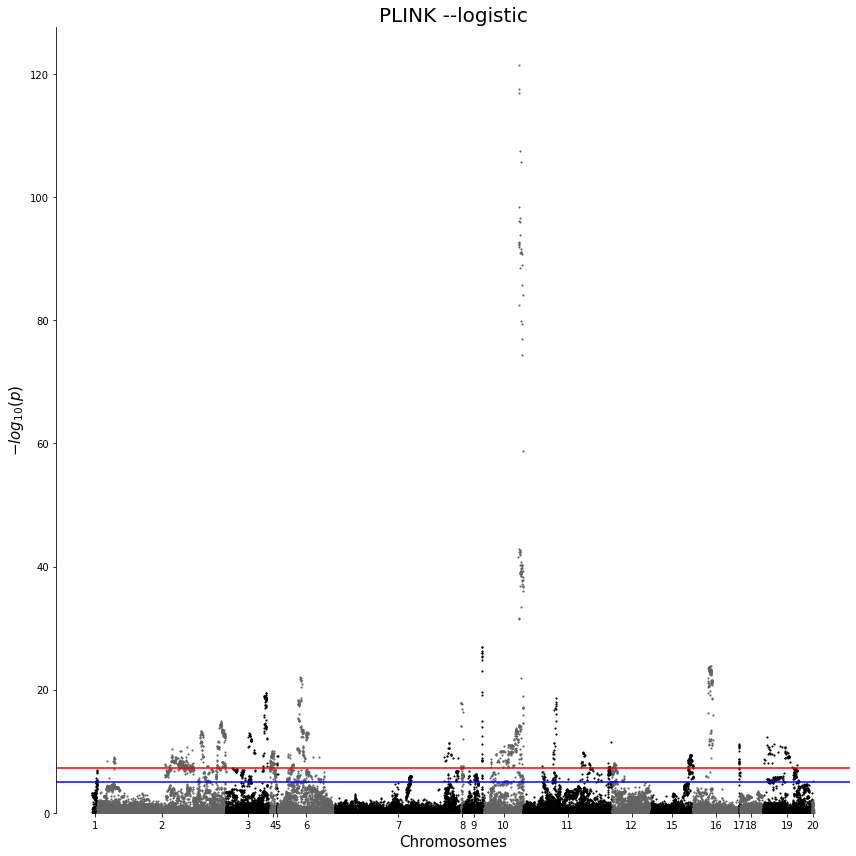

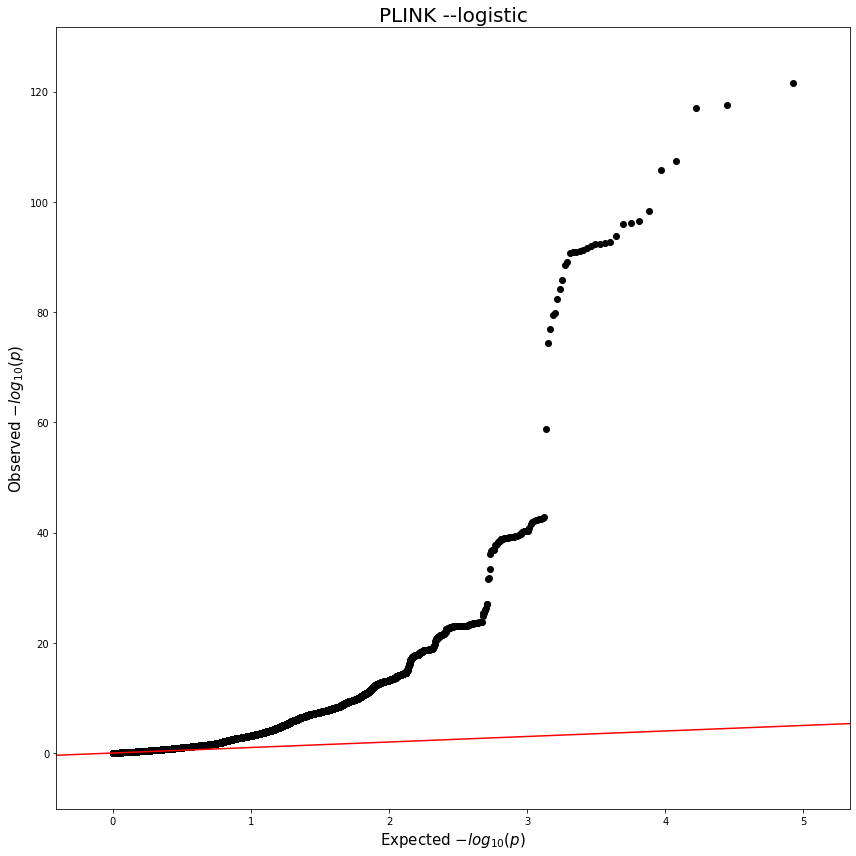

In [10]:
## generate Manhattan plot
qqman.manhattan(gwas_file_logistic, 
                out=plot_prefix_logistic+'.Manhattan.png', 
                show=True, 
                title='PLINK --logistic', 
                gap=50)

## generate qqplot
qqman.qqplot(pval_logistic, 
                out=plot_prefix_logistic+'.qqplot.png', 
                show=True, 
                title='PLINK --logistic')


#### Generate --logistic plots as subplot example

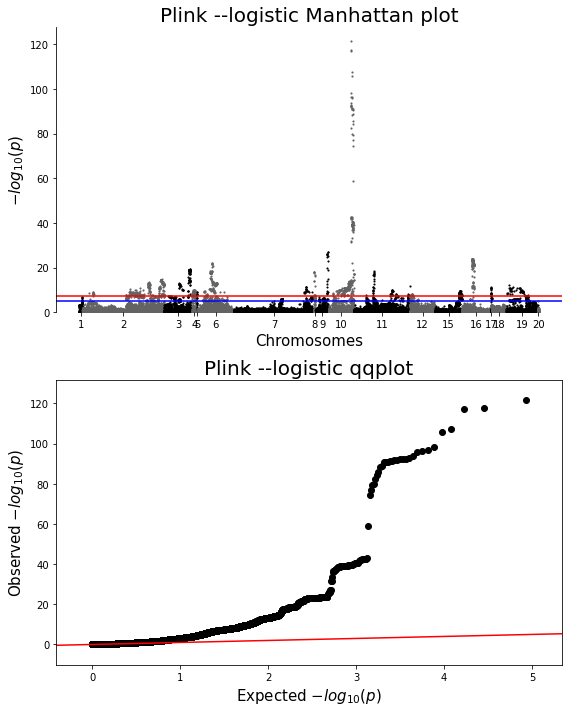

In [11]:
## generate plot figure
figure, axes = plt.subplots(nrows=2, ncols=1, figsize = (8,10))

qqman.manhattan(gwas_file_logistic, ax=axes[0], title="Plink --logistic Manhattan plot")
qqman.qqplot(pval_logistic, ax=axes[1], title="Plink --logistic qqplot")

figure.tight_layout()

#### Write output plot files  

> set `show=False`

In [12]:
## generate Manhattan plot
qqman.manhattan(gwas_file_logistic, 
                out=plot_prefix_logistic+'.Manhattan.png', 
                show=False, 
                title='PLINK --logistic', 
                gap=50)

## generate qqplot
qqman.qqplot(pval_logistic, 
                out=plot_prefix_logistic+'.qqplot.png', 
                show=False, 
                title='PLINK --logistic')

<br>  

## Example of how to format Manhattan plot

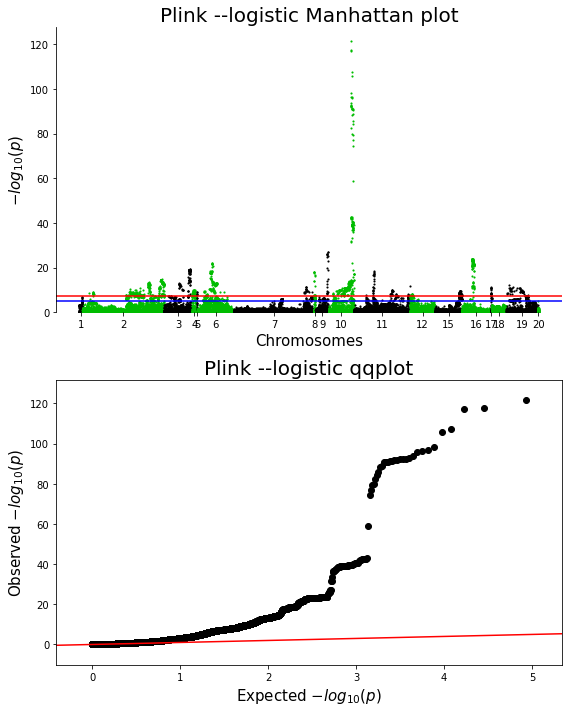

In [13]:
## generate plot figure
figure, axes = plt.subplots(nrows=2, ncols=1, figsize = (8,10))

qqman.manhattan(gwas_file_logistic, 
                ax=axes[0], 
                title="Plink --logistic Manhattan plot", 
                cmap=plt.get_cmap("nipy_spectral"), cmap_var=2, gap=50)

qqman.qqplot(pval_logistic, ax=axes[1], title="Plink --logistic qqplot")

figure.tight_layout()